In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras import applications
from keras.models import Sequential, Model, load_model
from tensorflow.keras.models import Sequential
import numpy as np
import os 
import random
import cv2
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
categories = {'cane': 'dog', "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel","ragno":"spider"}
data=[]
animals=["dog", "horse","elephant", "butterfly",  "chicken",  "cat", "cow",  "sheep", "squirrel","spider"]
img_size=100
def create_data():
        for category,translate in categories.items():
            path="../input/animals10/raw-img/"+category
            target=animals.index(translate)
            
            for img in os.listdir(path):
                try:
                    img_array=cv2.imread(os.path.join(path,img))
                    new_img_array=cv2.resize(img_array,(img_size,img_size))
                    data.append([new_img_array,target])
                except Exception as e:
                    pass
                
            
create_data()            

In [3]:
random.shuffle(data)
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)   
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [4]:

x_train=np.array(x_train).reshape(-1,img_size,img_size,3)
x_train=tf.keras.utils.normalize(x_train,axis=1)
y_train=np.array(y_train)


In [5]:
x_test=np.array(x_test).reshape(-1,img_size,img_size,3)
x_test=tf.keras.utils.normalize(x_test,axis=1)
y_test=np.array(y_test)

In [6]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from keras.utils import to_categorical

In [7]:


base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape= x_train.shape[1:])
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(10, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])



58892288/58889256 [==============================] - 2s 0us/step


In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [10]:

history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test, y_test))



Train on 20943 samples, validate on 5236 samples
Epoch 1/50
20943/20943 [==============================] - 45s 2ms/step - loss: 1.5585 - accuracy: 0.4590 - val_loss: 1.1106 - val_accuracy: 0.6253
Epoch 2/50
20943/20943 [==============================] - 44s 2ms/step - loss: 0.9045 - accuracy: 0.6925 - val_loss: 0.8100 - val_accuracy: 0.7227
Epoch 3/50
20943/20943 [==============================] - 44s 2ms/step - loss: 0.6853 - accuracy: 0.7694 - val_loss: 0.6763 - val_accuracy: 0.7687
Epoch 4/50
20943/20943 [==============================] - 44s 2ms/step - loss: 0.5528 - accuracy: 0.8152 - val_loss: 0.5969 - val_accuracy: 0.7970
Epoch 5/50
20943/20943 [==============================] - 44s 2ms/step - loss: 0.4773 - accuracy: 0.8407 - val_loss: 0.5591 - val_accuracy: 0.8151
Epoch 6/50
20943/20943 [==============================] - 43s 2ms/step - loss: 0.3920 - accuracy: 0.8700 - val_loss: 0.5288 - val_accuracy: 0.8161
Epoch 7/50
20943/20943 [==============================] - 43s 2ms/ste

In [11]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


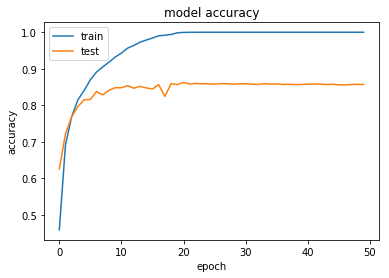

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
